# Assignment 3 Question 5


## Loading library and dataset


In [1]:
library(glmnet)
library(ISLR2)
library(pls)

attach(College)


Loading required package: Matrix

Loaded glmnet 4.1-2


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




In [2]:
MSE <- (\(predict, test) as.integer(mean((predict - test)**2)))

## Set random seed


In [3]:
seed <- 1668526516
print(seed)


[1] 1668526516


In [4]:
# seed <- as.integer(Sys.time())
# print(seed)


## Part A


In [5]:
set.seed(seed)


In [6]:
rand <- sample(nrow(College), nrow(College) / 2)
College.train <- College[rand, ]
College.test <- College[-rand, ]


## Part B


In [7]:
College.lm <- lm(Apps ~ ., data = College.train)
College.lm.pred <- predict(College.lm, College.test)
College.lm.MSE <- MSE(College.test$Apps, College.lm.pred)
College.lm.MSE


[1] 1532067

## Part C


In [8]:
College.train.mat <- model.matrix(Apps ~ ., College.train)
College.test.mat <- model.matrix(Apps ~ ., College.test)
grid <- 10**seq(5, -5, length = 1000)


In [9]:
set.seed(seed)


In [10]:
ridge.mod <- cv.glmnet(College.train.mat, College.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
lambda.ridge <- ridge.mod$lambda.min
lambda.ridge

ridge.pred <- predict(ridge.mod, College.test.mat, s = lambda.ridge)
ridge.MSE <- MSE(College.test$Apps, ridge.pred)
ridge.MSE


[1] 13.68158

[1] 1584537

## Part D


In [11]:
set.seed(seed)

In [12]:
lasso.mod <- cv.glmnet(College.train.mat, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
lambda.lasso <- lasso.mod$lambda.min
lambda.lasso

lasso.pred <- predict(lasso.mod, College.test.mat, s = lambda.lasso)
lasso.MSE <- MSE(College.test$Apps, lasso.pred)
lasso.MSE


[1] 12.76751

[1] 1613547

In [13]:
lasso.modA <- glmnet(model.matrix(Apps ~., data = College), College$Apps, alpha = 1)
lasso.coef <- predict(lasso.modA, s = lambda.lasso, type = "coefficients")
lasso.coef


19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -547.45330270
(Intercept)    .         
PrivateYes  -465.19161682
Accept         1.50816182
Enroll        -0.37074234
Top10perc     40.16663442
Top25perc     -6.90841389
F.Undergrad    .         
P.Undergrad    0.03634341
Outstate      -0.07011394
Room.Board     0.13680614
Books          .         
Personal       0.01458055
PhD           -6.93735030
Terminal      -3.12185511
S.F.Ratio      9.41059698
perc.alumni   -0.66225807
Expend         0.07301655
Grad.Rate      6.50213112

## Part E


In [14]:
set.seed(seed)

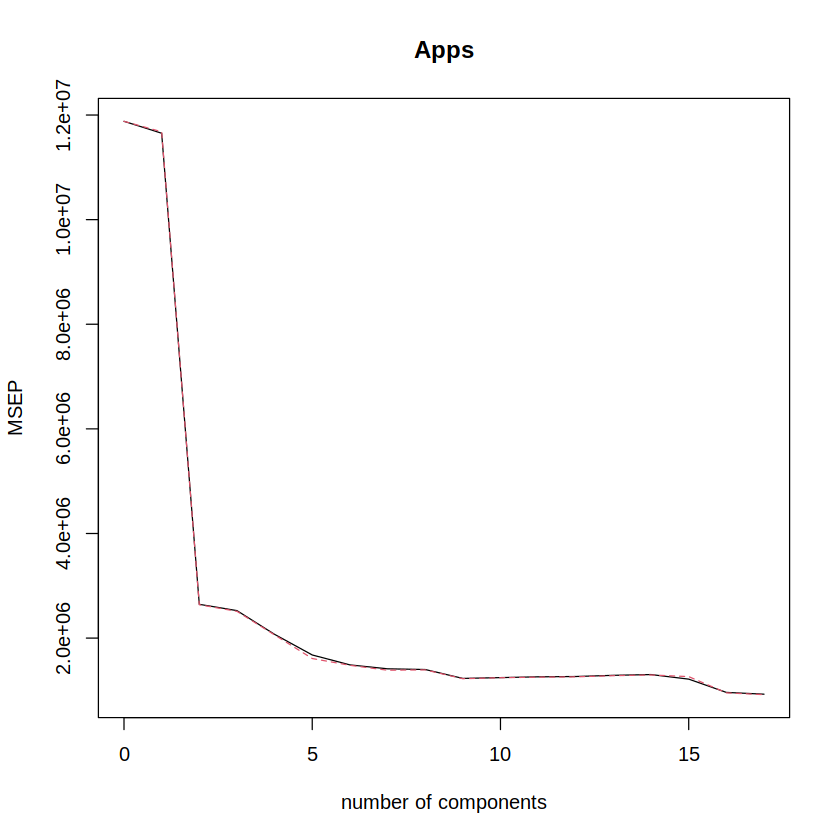

In [15]:
pcr.mod <- pcr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
validationplot(pcr.mod, val.type = "MSEP")


In [16]:
pcr.pred <- predict(pcr.mod, College.test, ncomp = 9)
pcr.MSE <- MSE(College.test$Apps, pcr.pred)
pcr.MSE

[1] 3139869

In [17]:
College.lm.MSE
ridge.MSE
lasso.MSE

lambda.ridge
lambda.lasso

[1] 1532067

[1] 1584537

[1] 1613547

[1] 13.68158

[1] 12.76751